Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_7620\1993932204.py:109: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.1595 - accuracy: 0.2727 - val_loss: 1.0523 - val_accuracy: 0.4375
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.9520 - accuracy: 0.5312 - val_loss: 0.8966 - val_accuracy: 0.5938
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.8001 - accuracy: 0.6364 - val_loss: 0.8449 - val_accuracy: 0.5938
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 0.7093 - accuracy: 0.7656 - val_loss: 0.6769 - val_accuracy: 0.7656
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.6828 - accuracy: 0.8485 - val_loss: 0.5891 - val_accuracy: 0.8438
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.5572 - accuracy: 0.8750 - val_loss: 0.5155 - val_accuracy: 0.8438
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.5094 - accuracy: 0.7812 - val_loss: 0.4442 - val_accuracy: 0.8750
Epoch 8/100
1/1 [=================

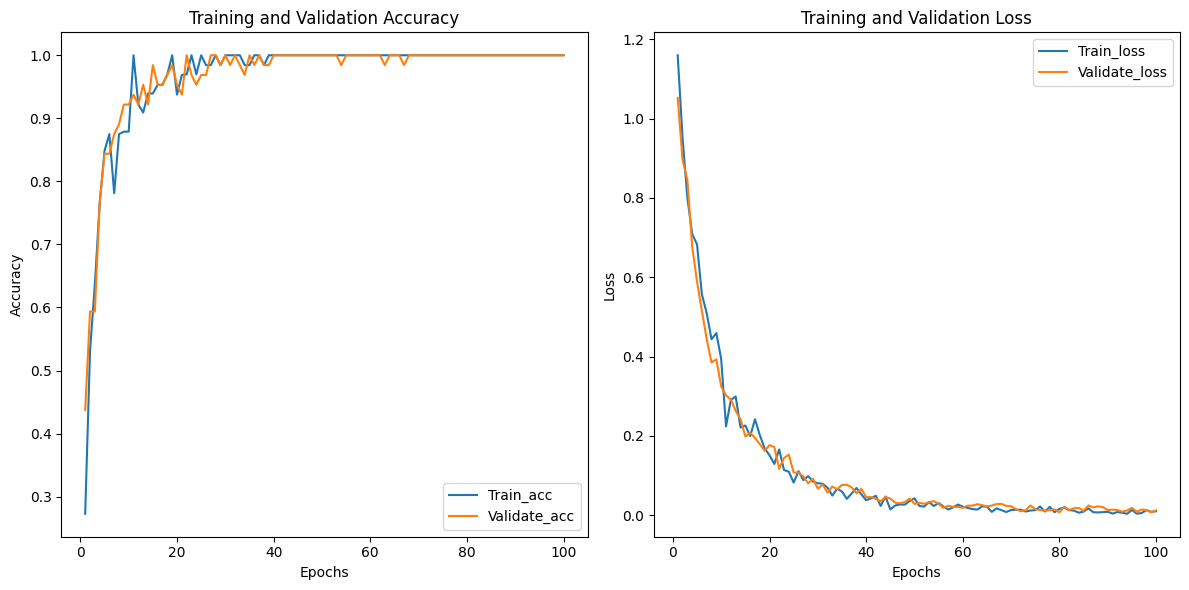

Found 15 images belonging to 3 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_7620\1993932204.py:156: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


(15, 3)
[[9.35132384e-01 5.93701787e-02 5.49741695e-03]
 [9.83673036e-01 1.01632038e-02 6.16384856e-03]
 [9.86213386e-01 1.36608677e-02 1.25721504e-04]
 [8.79792690e-01 4.20874171e-02 7.81198964e-02]
 [7.06118415e-04 9.99036431e-01 2.57523556e-04]
 [4.56959824e-04 9.97283816e-01 2.25915620e-03]
 [7.24284025e-03 9.88642037e-01 4.11515217e-03]
 [1.17053673e-01 8.46150875e-01 3.67954373e-02]
 [5.16739237e-05 9.99840260e-01 1.07986285e-04]
 [7.86798191e-04 9.96764064e-01 2.44911900e-03]
 [8.23914725e-03 2.51253678e-05 9.91735756e-01]
 [5.54107167e-02 1.49482945e-02 9.29641008e-01]
 [2.27867067e-02 1.10278297e-02 9.66185510e-01]
 [2.54614592e-01 8.22370313e-03 7.37161696e-01]
 [5.52889484e-04 1.85267755e-03 9.97594416e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
Confusion Matrix:
[[4 0 0]
 [0 6 0]
 [0 0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00     

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = base_model.output

# Global Average Pooling Layer
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)  # Adjusted to 512 nodes
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# Freeze layers
for layer in model.layers[:86]:
    layer.trainable = False

# Unfreeze layers for the second set
for layer in model.layers[86:130]:
    layer.trainable = True

# Unfreeze layers for the third set
for layer in model.layers[130:]:
    layer.trainable = True

# Summary and compile the model
model.summary()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and image data generators
seed_value = 42
batch_size = 64  # Adjusted batch size
seed_val = 123
epochs = 75  # Adjusted number of epochs

# Create DataGenerator objects
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode="nearest",
)

# Create Train Image generator
train_generator = datagen.flow_from_directory(
    './Train/',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=True
)

# Create Validation Image generator
val_generator = datagen.flow_from_directory(
    './Validate/',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_val,
    shuffle=True
)

# Create Optimizer
opts = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opts, metrics=['accuracy'])
eps = 50
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

# Check step size train = step size val
if step_size_train != step_size_val:
    print("Warning: step_size_train is not equal to step_size_val.")
    new_batch_size = val_generator.n // step_size_train
    val_generator = datagen.flow_from_directory(
        './Validate/',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=new_batch_size,
        class_mode='categorical',
        seed=seed_val,
        shuffle=True
    )
    step_size_val = val_generator.n // val_generator.batch_size
    print(f"Adjusted batch size to {new_batch_size} to make step_size_train equal to step_size_val.")

eps = 100

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              validation_data=val_generator,
                              validation_steps=step_size_val,
                              epochs=eps,
                              verbose=1)

# Performance Visualization
epochs = range(1, 100 + 1)

# View Accuracy (Training, Validation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label="Train_acc")
plt.plot(epochs, history.history["val_accuracy"], label="Validate_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label="Train_loss")
plt.plot(epochs, history.history['val_loss'], label="Validate_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Initial test generator
testPath = './Test/'
test_generator = datagen.flow_from_directory(
    testPath,
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=1
)

# Get class id for y_real_class
y_true = test_generator.classes

# Predict images according to test_generator
preds = model.predict_generator(test_generator)
print(preds.shape)
print(preds)

# Get predicted class labels (argmax along axis 1)
y_pred = np.argmax(preds, axis=1)
print(y_true)
print(y_pred)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)
y_pred = np.argmax(preds, axis=1)
print(test_generator.classes)
print(y_pred)

# Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

Found 97 images belonging to 3 classes.
Found 69 images belonging to 3 classes.
Found 69 images belonging to 3 classes.
Adjusted batch size to 23 to make step_size_train equal to step_size_val.


C:\Users\User\AppData\Local\Temp\ipykernel_7620\1243168689.py:109: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/100
3/3 [==============================] - 6s 1s/step - loss: 1.1865 - accuracy: 0.3538 - val_loss: 0.9334 - val_accuracy: 0.5652
Epoch 2/100
3/3 [==============================] - 4s 2s/step - loss: 1.0127 - accuracy: 0.4154 - val_loss: 0.9337 - val_accuracy: 0.5072
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.8546 - accuracy: 0.5729 - val_loss: 0.6137 - val_accuracy: 0.8116
Epoch 4/100
3/3 [==============================] - 3s 2s/step - loss: 0.6019 - accuracy: 0.7846 - val_loss: 0.5232 - val_accuracy: 0.8551
Epoch 5/100
3/3 [==============================] - 4s 2s/step - loss: 0.4958 - accuracy: 0.8438 - val_loss: 0.4565 - val_accuracy: 0.8551
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.4738 - accuracy: 0.8462 - val_loss: 0.3482 - val_accuracy: 0.9275
Epoch 7/100
3/3 [==============================] - 4s 2s/step - loss: 0.3071 - accuracy: 0.9167 - val_loss: 0.2770 - val_accuracy: 0.9420
Epoch 8/100
3/3 [=================

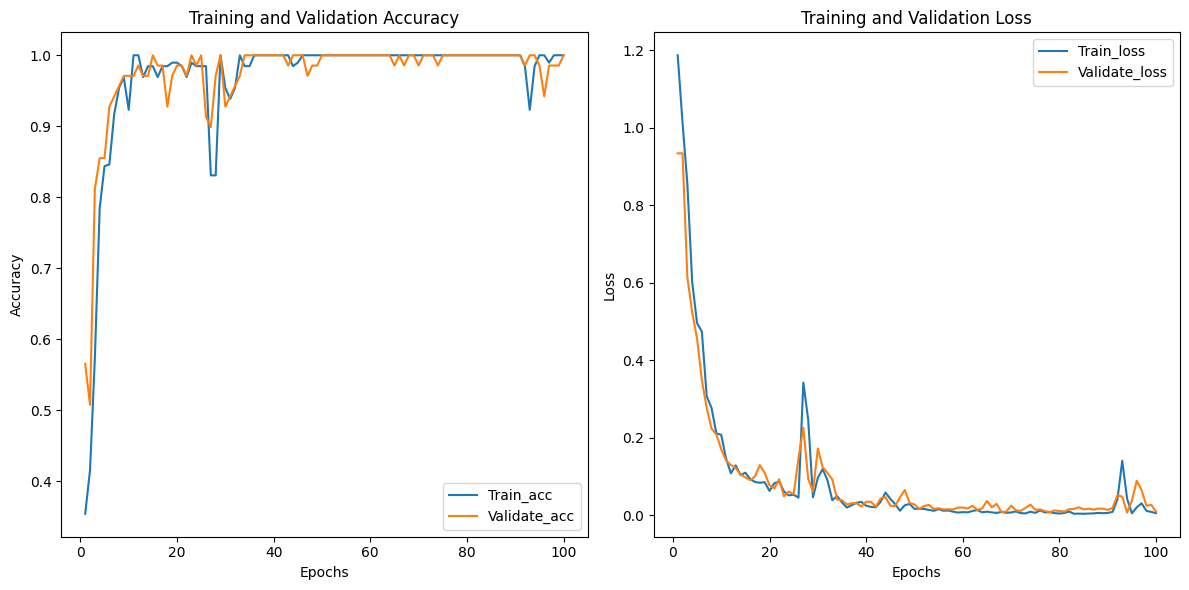

Found 15 images belonging to 3 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_7620\1243168689.py:156: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


(15, 3)
[[9.8896712e-01 4.6676910e-03 6.3652303e-03]
 [9.7143662e-01 2.4966447e-02 3.5968632e-03]
 [9.8962831e-01 9.8030306e-03 5.6866137e-04]
 [6.6353905e-01 7.0858873e-02 2.6560205e-01]
 [3.6912572e-03 9.9580020e-01 5.0854211e-04]
 [6.2655006e-04 9.9894422e-01 4.2930446e-04]
 [3.3492292e-04 9.9780434e-01 1.8607379e-03]
 [1.8193947e-02 9.8055971e-01 1.2463237e-03]
 [1.0254528e-05 9.9997890e-01 1.0879919e-05]
 [3.7805591e-02 8.1066394e-01 1.5153039e-01]
 [8.1304088e-03 3.6056470e-05 9.9183357e-01]
 [4.1105837e-02 3.9610518e-03 9.5493311e-01]
 [5.2620997e-03 1.5629398e-02 9.7910851e-01]
 [1.3708785e-01 5.4382905e-03 8.5747379e-01]
 [1.2003647e-04 3.4852442e-03 9.9639469e-01]]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
Confusion Matrix:
[[4 0 0]
 [0 6 0]
 [0 0 5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = base_model.output

# Global Average Pooling Layer
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)  # Adjusted to 512 nodes
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# Freeze layers
for layer in model.layers[:86]:
    layer.trainable = False

# Unfreeze layers for the second set
for layer in model.layers[86:130]:
    layer.trainable = True

# Unfreeze layers for the third set
for layer in model.layers[130:]:
    layer.trainable = True

# Summary and compile the model
model.summary()
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing and image data generators
seed_value = 42
batch_size = 32  # Adjusted batch size
seed_val = 123
epochs = 100  # Adjusted number of epochs

# Create DataGenerator objects
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode="nearest",
)

# Create Train Image generator
train_generator = datagen.flow_from_directory(
    './Train/',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=True
)

# Create Validation Image generator
val_generator = datagen.flow_from_directory(
    './Validate/',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_val,
    shuffle=True
)

# Create Optimizer
opts = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opts, metrics=['accuracy'])
eps = 50
step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size

# Check step size train = step size val
if step_size_train != step_size_val:
    print("Warning: step_size_train is not equal to step_size_val.")
    new_batch_size = val_generator.n // step_size_train
    val_generator = datagen.flow_from_directory(
        './Validate/',
        target_size=(224, 224),
        color_mode='rgb',
        batch_size=new_batch_size,
        class_mode='categorical',
        seed=seed_val,
        shuffle=True
    )
    step_size_val = val_generator.n // val_generator.batch_size
    print(f"Adjusted batch size to {new_batch_size} to make step_size_train equal to step_size_val.")

eps = 100

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=step_size_train,
                              validation_data=val_generator,
                              validation_steps=step_size_val,
                              epochs=eps,
                              verbose=1)

# Performance Visualization
epochs = range(1, 100 + 1)

# View Accuracy (Training, Validation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label="Train_acc")
plt.plot(epochs, history.history["val_accuracy"], label="Validate_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label="Train_loss")
plt.plot(epochs, history.history['val_loss'], label="Validate_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Initial test generator
testPath = './Test/'
test_generator = datagen.flow_from_directory(
    testPath,
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=1
)

# Get class id for y_real_class
y_true = test_generator.classes

# Predict images according to test_generator
preds = model.predict_generator(test_generator)
print(preds.shape)
print(preds)

# Get predicted class labels (argmax along axis 1)
y_pred = np.argmax(preds, axis=1)
print(y_true)
print(y_pred)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)
y_pred = np.argmax(preds, axis=1)
print(test_generator.classes)
print(y_pred)

# Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
